In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import sys
import requests
import re

In [2]:
url = "http://scedc.caltech.edu/recent/Maps/118-36.html"
html = requests.get(url).content

In [3]:
data = []
for iline,line in enumerate(html.split("<PRE>",3)[3].rsplit("</PRE>",1)[0].splitlines()):
    line = (line
            .replace("<STRONG>","").replace("</STRONG>","")
            .replace("<FONT COLOR=red>","").replace("</FONT>","")
            .strip())
    if not line: continue
    parts = re.split("(<|>)",line)
#     print parts
#     print iline, line
    magnitude = float(parts[0])
    parts = parts[4].split()
    date = " ".join(parts[:2])
    lat = parts[2]
    lng = parts[3]
    depth = parts[4]
    data.append(dict(mag=magnitude,date=date,lat=lat,lng=lng,depth=depth))
#     if iline > 10:
#         break
dfc = pd.DataFrame(data)
dfc["date"] = pd.to_datetime(dfc["date"])
for k in ["lat","lng"]:
    dfc[k] = dfc[k].str.replace("N","").str.replace("W","")
ks = ["mag","lat","lng","depth"]
dfc[ks] = dfc[ks].astype(float)

In [4]:

df = dfc[dfc["date"]>pd.Timestamp(2019,7,4)].sort_values("date")

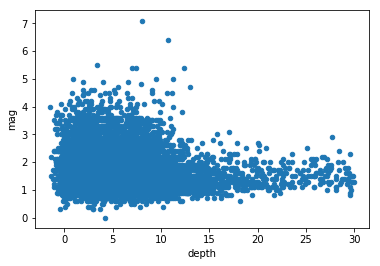

In [5]:
df.plot.scatter(x="depth",y="mag")

Text(0,0.5,'magnitude')

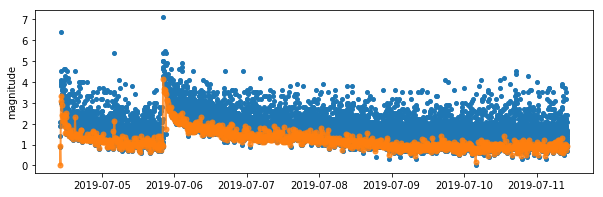

In [6]:
# x = df.set_index("date").resample("30min").apply(lambda x:0.5*(x.max()+x.min()))
x = df.set_index("date").resample("10min").apply(lambda x:np.quantile(np.pad(x,max(1-len(x),0),"constant",constant_values=0),0.02))
# x = df.set_index("date").resample("2h").mean()
# x = df.set_index("date").rolling("1h").mean()

fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
ax.plot_date(x.index,x.mag,ms=5.0,alpha=0.8,lw=2,ls="-")
ax.set_ylabel("magnitude")
# ax.set_yscale("log")

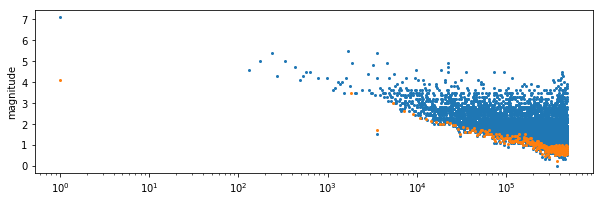

In [7]:
x1 = df[df.date>=df[df.mag>=7.1]["date"].iloc[0]]
x2 = x1.set_index("date").resample("30min").apply(lambda x:np.quantile(np.pad(x,max(1-len(x),0),"constant",constant_values=0),0.01))
# x = df.set_index("date").resample("2h").mean()

# secs = x2.index.astype(int)/1e9
s1 = x1.date.astype(int)/1e9
s1 -= s1.min()-1

s2 = x2.index.astype(int)/1e9
s2 -= s2.min()-1
# print secs

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(s1,x1.mag,"o",ms=2.0)
ax.plot(s2,x2.mag,"o",ms=2.0)
# ax.plot(secs,x2.mag,ms=5.0,alpha=0.8,lw=2,ls="-")
ax.set_ylabel("magnitude")

# print s2
# ax.set_yscale("log")
ax.set_xscale("log",)

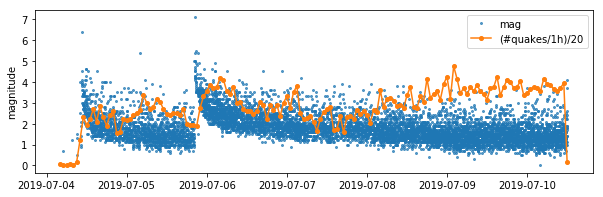

In [7]:
# x = df.set_index("date").resample("30min").apply(lambda x:0.5*(x.max()+x.min()))
# x = df.set_index("date").resample("30min").count()
x = df.set_index("date").resample("1h").count()
# x = df.set_index("date").rolling("2h").count()

fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=2.0,alpha=0.7)
ax.plot_date(x.index,x.mag/20,ms=4.0,alpha=1.0,label="(#quakes/1h)/20",lw=1.5,ls="-")
ax.set_ylabel("magnitude")
ax.legend()

In [8]:
# np.log10(np.power(10,[5,3]).mean())
np.log10(np.power(10,[5,3]).sum())
# np.log10(np.power([5,3],10).sum())

5.004321373782642

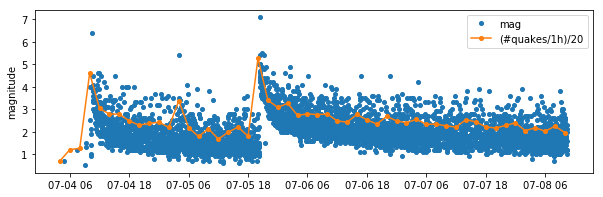

In [26]:
# x = df.set_index("date").resample("30min").apply(lambda x:0.5*(x.max()+x.min()))
# x = df.set_index("date").resample("30min").count()
# x = df.set_index("date").resample("2h").sum()
x = df.set_index("date").resample("2h").apply(lambda x: np.log10(np.power(10,x).mean()))
# x = df.set_index("date").rolling("1h").count()

fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
ax.plot_date(x.index,x.mag,ms=4.0,alpha=1.0,label="(#quakes/1h)/20",lw=1.5,ls="-")
ax.set_ylabel("magnitude")
ax.legend()

In [27]:
df[df.mag>5]

,date,depth,lat,lng,mag
3299,2019-07-04 10:33:49,10.7,35.705,117.506,6.4
2522,2019-07-05 04:07:53,7.0,35.760,117.575,5.4
1666,2019-07-05 20:19:52,8.0,35.766,117.605,7.1
1663,2019-07-05 20:23:50,12.4,35.800,117.605,5.4
1646,2019-07-05 20:47:53,3.4,35.903,117.746,5.5
1633,2019-07-05 21:18:55,2.2,35.905,117.682,5.4


Text(0,0.5,'magnitude')

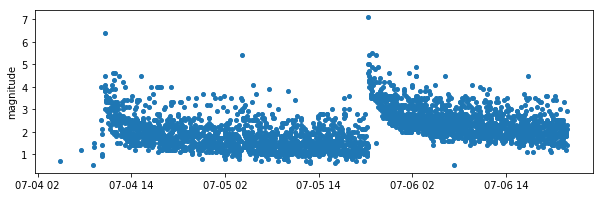

In [184]:
# df.plot(x="date",y="mag",figsize=(10,3),lw=0,ms=2)
fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
# ax.plot_date(df.date,df.depth,ms=4.0,alpha=1.0)
ax.set_ylabel("magnitude")
# ax.set_yscale("log")

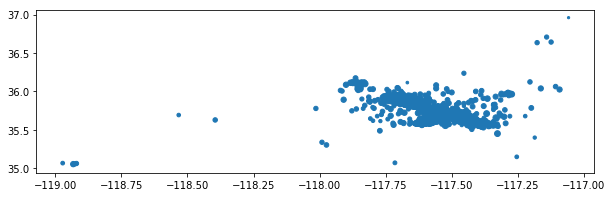

In [181]:
# df.plot(x="date",y="mag",figsize=(10,3),lw=0,ms=2)
fig,ax = plt.subplots(figsize=(10,3))
# ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
ax.scatter(-df.lng,df.lat,s=10*df.mag,alpha=1.0)

In [130]:
data = []

for year in range(1995,2019+1):
    print year
    url = "http://service.scedc.caltech.edu/ftp/catalogs/SCSN/{}.catalog".format(year)
    content = requests.get(url).content
    for iline,line in enumerate(content.splitlines()):
        if line.startswith("#"): continue
        if not line.strip(): continue
        year = line[0:4]
        month = line[5:7]
        day = line[8:10]
        hour = line[12:14]
        minute = line[15:17]
        second = line[18:23]
        latitude = line[25:33]
        longitude = line[33:43]
        q = line[44:45]
        magnitude = line[46:49]
        depth = line[50:60]
        nph = line[60:62]
        rms = line[62:71]
    #     print latitude, line
        latitude = float(latitude.split()[0])+float(latitude.split()[1])/60.
        longitude = float(longitude.split()[0])+float(longitude.split()[1])/60.
        data.append(dict(
            date="{}/{}/{} {}:{}:{}".format(year,month,day,hour,minute,second),
            lat=latitude,
            lng=longitude,
            mag=float(magnitude),
            q=q.strip(),
            depth=float(depth),
            nph=int(nph),
            rms=float(rms),
        ))
#     print year, month, day, hour, minute, second, latitude
#     print latitude, longitude, q, magnitude, depth, nph, rms
#     if iline > 20: break
dfc = pd.DataFrame(data)
dfc["date"] = pd.to_datetime(dfc["date"],errors="coerce")

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [140]:
dfc.head()

,date,depth,lat,lng,mag,nph,q,rms
0,1995-01-01 00:54:52.060,4.79,36.014,-116.208,0.8,8,C,0.19
1,1995-01-01 00:55:43.940,1.16,34.390,-115.543,1.6,15,A,0.07
2,1995-01-01 01:01:47.170,5.82,33.727,-117.171,2.0,26,C,0.33
3,1995-01-01 01:22:19.760,0.80,36.112,-116.165,1.1,9,A,0.16
4,1995-01-01 01:44:19.000,3.14,35.921,-116.087,0.9,11,A,0.03


In [141]:
dfc[dfc.mag>7.0].index

Int64Index([83071, 240353, 424274], dtype='int64')

In [142]:
def distance(lat1, long1, lat2, long2):
    r_earth = 3956.547 # miles
    miles_per_lat_deg = np.pi*r_earth/180.0
    miles_per_long_deg = 2.0*np.pi*r_earth*np.cos(lat1*np.pi/180.0)/360.0
    dx = np.abs(long2-long1)*miles_per_long_deg
    dy = np.abs(lat2-lat1)*miles_per_lat_deg
    return np.sqrt(dx**2 + dy**2)

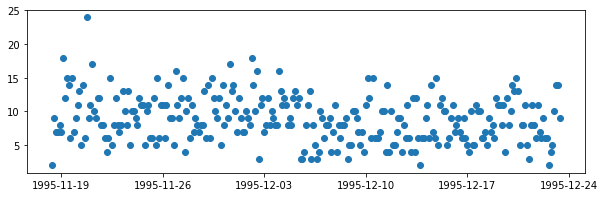

In [143]:
x = dfc.iloc[22016:22016+2500]
x = x.set_index("date").resample("3h").count()
fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(x.index,x.mag)

83071 1999-10-16 09:46:44.460000 7.1
156560 2003-12-22 19:15:55.900000 6.5
240353 2010-04-04 22:40:42.360000 7.2
422549 2019-07-04 17:33:49.040000 6.4
424274 2019-07-06 03:19:52.630000 7.1


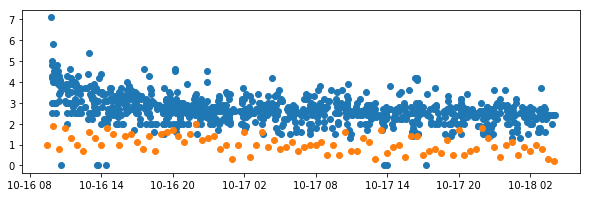

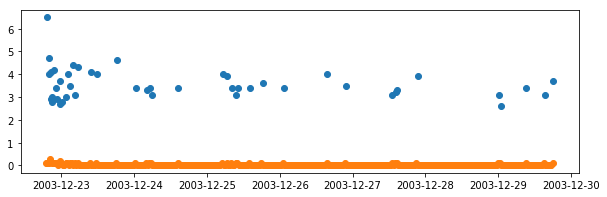

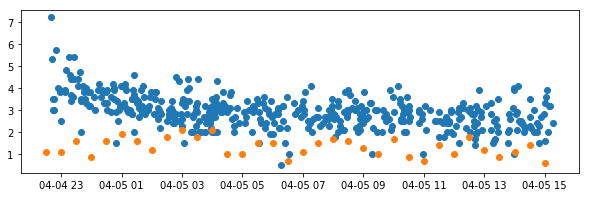

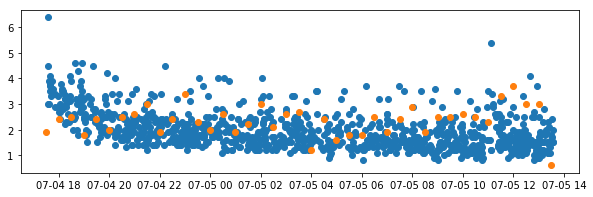

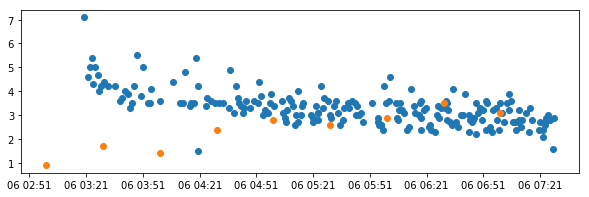

In [149]:
for idx in dfc[dfc.mag>6].index:
    x = dfc.iloc[idx:idx+1000]
    dist = distance(dfc.iloc[idx].lat,dfc.iloc[idx].lng,x.lat,x.lng)
    timeclose = x.date-dfc.iloc[idx].date < pd.Timedelta("7 days")
    sel = (dist < 35) & timeclose
    x = x[sel]
    if len(x) < 30: continue
    print idx, dfc.iloc[idx].date, dfc.iloc[idx].mag
    fig,ax = plt.subplots(figsize=(10,3))
    ax.plot_date(x.date,x.mag)
    x = x.set_index("date").resample("30min").count()
    ax.plot_date(x.index,x.mag/10)

In [124]:
# df = dfc[dfc["date"]>pd.Timestamp(2019,7,4)]

Text(0,0.5,'magnitude')

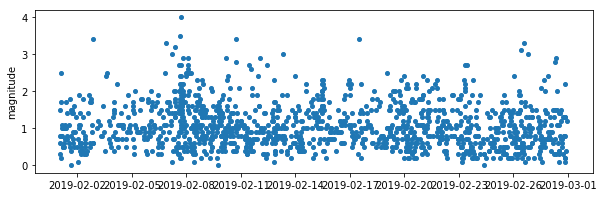

In [274]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
ax.set_ylabel("magnitude")

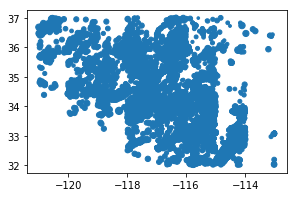

In [275]:
fig,ax = plt.subplots(figsize=(10,3))
# ax.plot_date(df.date,df.mag,ms=4.0,alpha=1.0)
ax.scatter(dfc.lng,dfc.lat,s=10.0*dfc.mag)
ax.set_aspect(1)

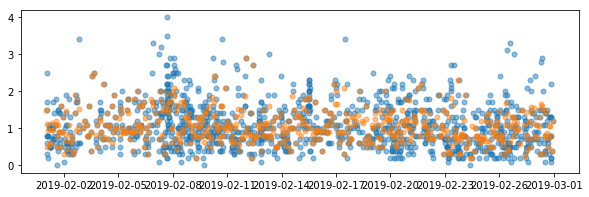

In [276]:
df = dfc[(dfc["date"]>pd.Timestamp(2019,2,1)) & (dfc["date"]<pd.Timestamp(2019,3,1))]
x = df.set_index("date").resample("1h").mean()
fig,ax = plt.subplots(figsize=(10,3))
ax.plot_date(df.date,df.mag,ms=5.0,alpha=0.5)
ax.plot_date(x.index,x.mag,ms=5.0,alpha=0.5)

In [278]:
dfc[dfc.mag>5]

,date,depth,lat,lng,mag,nph,q,rms
22016,2014-03-29 04:09:42.170,5.097,33.932500,-116.084167,5.1,16,A,0.24
54224,2016-06-10 08:04:38.700,12.312,33.431500,-115.557333,5.2,66,A,0.23
85167,2018-04-05 19:29:16.500,9.871,33.837500,-118.274167,5.3,75,C,0.31
111922,2019-07-04 17:33:49.040,10.712,35.705167,-116.494000,6.4,2,A,0.19
112762,2019-07-05 11:07:53.040,6.952,35.760333,-116.425000,5.4,56,A,0.20
113647,2019-07-06 03:19:52.630,17.001,35.766500,-116.395167,7.1,87,D,0.29
113650,2019-07-06 03:23:50.550,12.430,35.800167,-116.394833,5.4,31,A,0.23
113667,2019-07-06 03:47:53.400,3.371,35.903000,-116.254167,5.5,92,A,0.26
113682,2019-07-06 04:18:55.720,2.171,35.904667,-116.317667,5.4,67,D,0.22


In [280]:
dfc.q.value_counts()

A    103011
C      8234
B      2136
D       484
Z        13
Name: q, dtype: int64

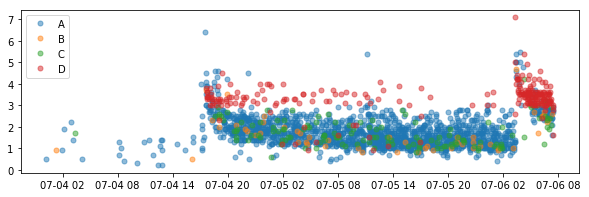

In [293]:
df = dfc[(dfc["date"]>pd.Timestamp(2019,7,4))].sort_values("date")
fig,ax = plt.subplots(figsize=(10,3))
for name,group in df.groupby("q"):
    ax.plot_date(group.date,group.mag,ms=5.0,alpha=0.5,label=name)
ax.legend()

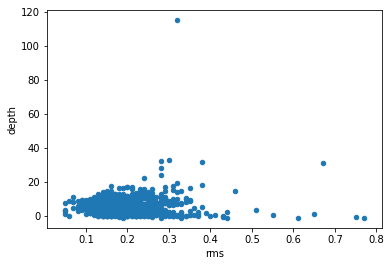

In [298]:
df.plot.scatter(x="rms",y="depth")